<a href="https://colab.research.google.com/github/avatar220928/Colab-Github/blob/plots/%E7%9B%B8%E9%97%9C%E4%BF%82%E6%95%B8%E5%9C%96(google_vs_new_cases).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import requests
from bs4 import BeautifulSoup
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
from csv import reader

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **去除google sheet的空值**

In [6]:
def deletenan (sheets,a):
  A = sheets.col_values(a)
  #print(A)
  country_google_name = A.copy() #A是google_name的複製版
  for i in range(len(A)):
    if A[i]== '':
      country_google_name.remove(A[i])
  return country_google_name

# **def: 畫相關係數圖**

In [7]:
labels = [ 'retail', 'grocery', 'park', 'transit', 'workplaces', 'FB']

def sign (a):
  return int(a/abs(a))

def plot(mobility,x_var,hue_var,title,dst_dir=None):
  fig,ax=plt.subplots(figsize=(20,10))
  
  width=0.1
  barplot = sns.barplot(x=x_var,y='Coefficient_of_Correlation', hue=hue_var,data=mobility,palette = "Blues")
  barplot.set_xlabel("place",fontsize=15)
  barplot.set_ylabel("Coefficient_of_Correlation",fontsize=15)
  barplot.tick_params(labelsize=15)
  barplot.set_title(title)

  # for aa in range(len(['p-value'])):
  #   ['p-value'][aa] = int(float(['p-value'][aa]))

  for bar,p in zip(barplot.patches,mobility['p-value']):
    if 0.05 >= p > 0.01:
      barplot.annotate('*', (bar.get_x() + bar.get_width() / 2., bar.get_height()),ha='center', va='center', fontsize=20, color='black', xytext=(0,20*sign(bar.get_height())),textcoords='offset points')
    elif 0.01 >= p > 0.001:
      barplot.annotate('**', (bar.get_x() + bar.get_width() / 2., bar.get_height()),ha='center', va='center', fontsize=20, color='black', xytext=(0,20*sign(bar.get_height())),textcoords='offset points')
    elif 0.001 >= p :
      barplot.annotate('***', (bar.get_x() + bar.get_width() / 2., bar.get_height()),ha='center', va='center', fontsize=20, color='black', xytext=(0,20*sign(bar.get_height())),textcoords='offset points')

  plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
  custom_params = {"axes.spines.right": False, "axes.spines.top": False}
  sns.set_theme(style="whitegrid", rc=custom_params)
  plt.tight_layout()

 

# **def: 從google drive提取相關係數表格並畫圖**

In [8]:
file_name_1= '{}_Google_相關係數.csv'
file_name_2= '{}_FB_相關係數.csv'

def countryplot(data):

  for ii in range(len(data[0])):
    if data[0][ii] == 'Morocco':
      pass
    else:
      country_mobility_1 = pd.read_csv('/content/drive/MyDrive/mobility移動資料/相關係數表格/google/'+ file_name_1.format(data[1][ii]))
      #print(list_of_rows[i][0],country_mobility_1)
      google_df_idx = country_mobility_1[(country_mobility_1["Coefficient_of_Correlation"]==-99) & (country_mobility_1["p-value"]==-99)].index
      google_corr = country_mobility_1.drop(google_df_idx)

      country_mobility_2 = pd.read_csv('/content/drive/MyDrive/mobility移動資料/相關係數表格/fb/'+ file_name_2.format(data[2][ii]))
      fb_df_idx = country_mobility_2[(country_mobility_2["Coefficient_of_Correlation"]==-99) & (country_mobility_2["p-value"]==-99)].index
      fb_corr = country_mobility_1.drop(fb_df_idx)
      mobility=pd.concat([google_corr, fb_corr]) 
      # print(mobility)
      if data[1][ii]=='MA':
        pass
      else:
        plot(mobility,x_var='place',hue_var='n',title=data[0][ii])
      plt.savefig(data[0][ii]+"_相關係數圖.png",bbox_inches='tight')
      plt.show()

# **從google sheet(國家全名)提取資料作為迴圈參數**

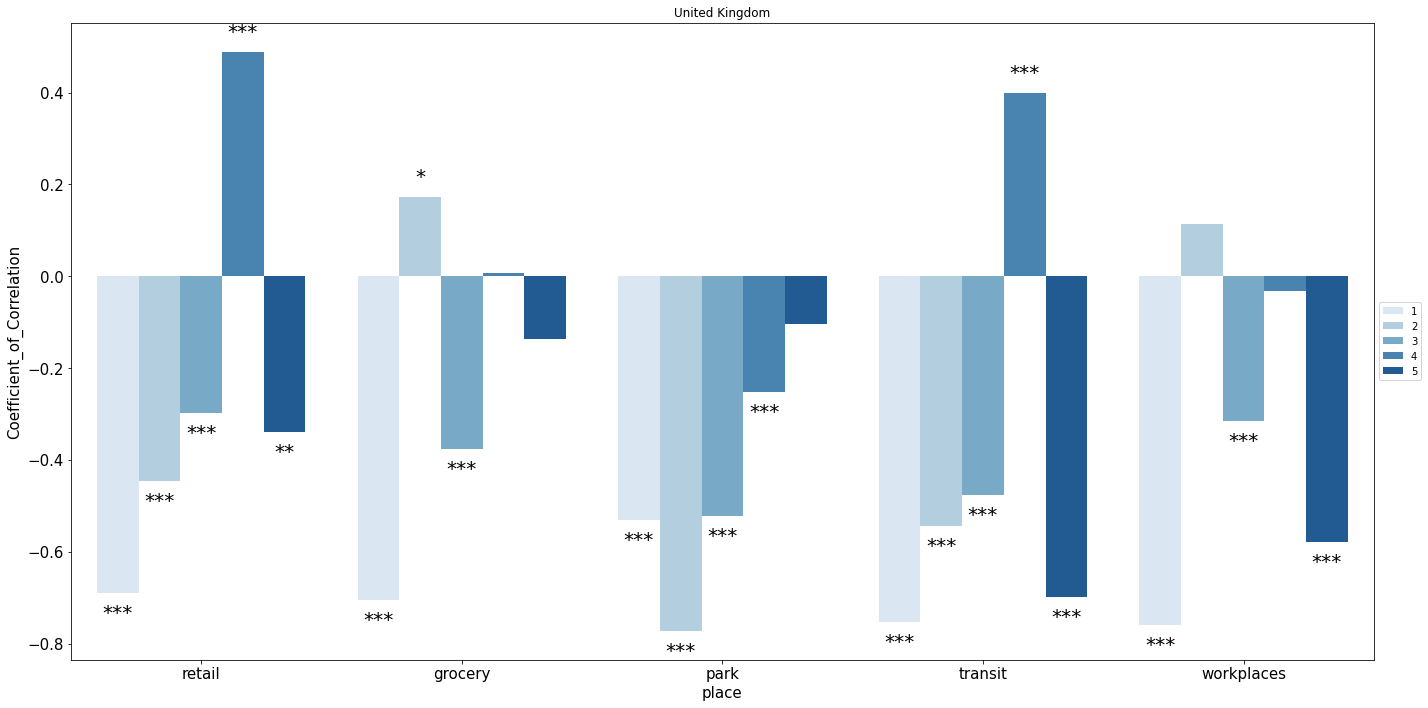

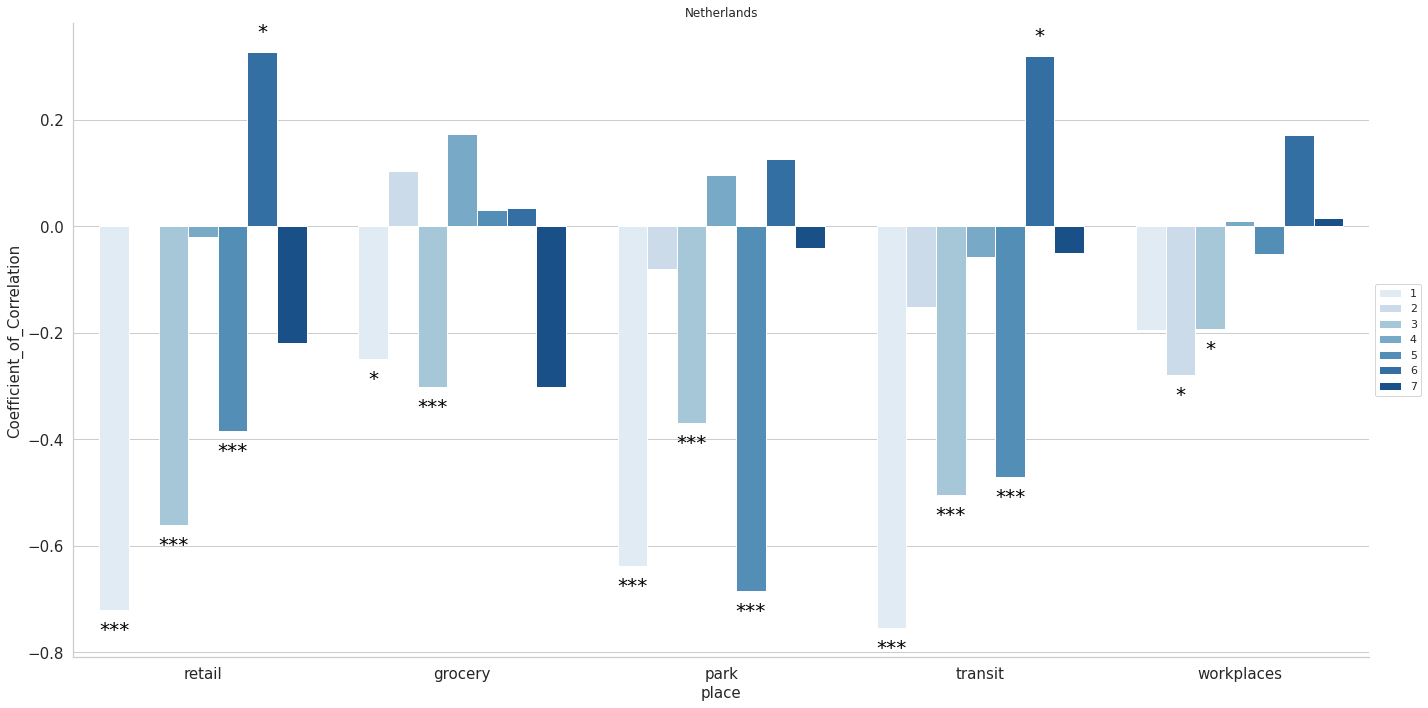

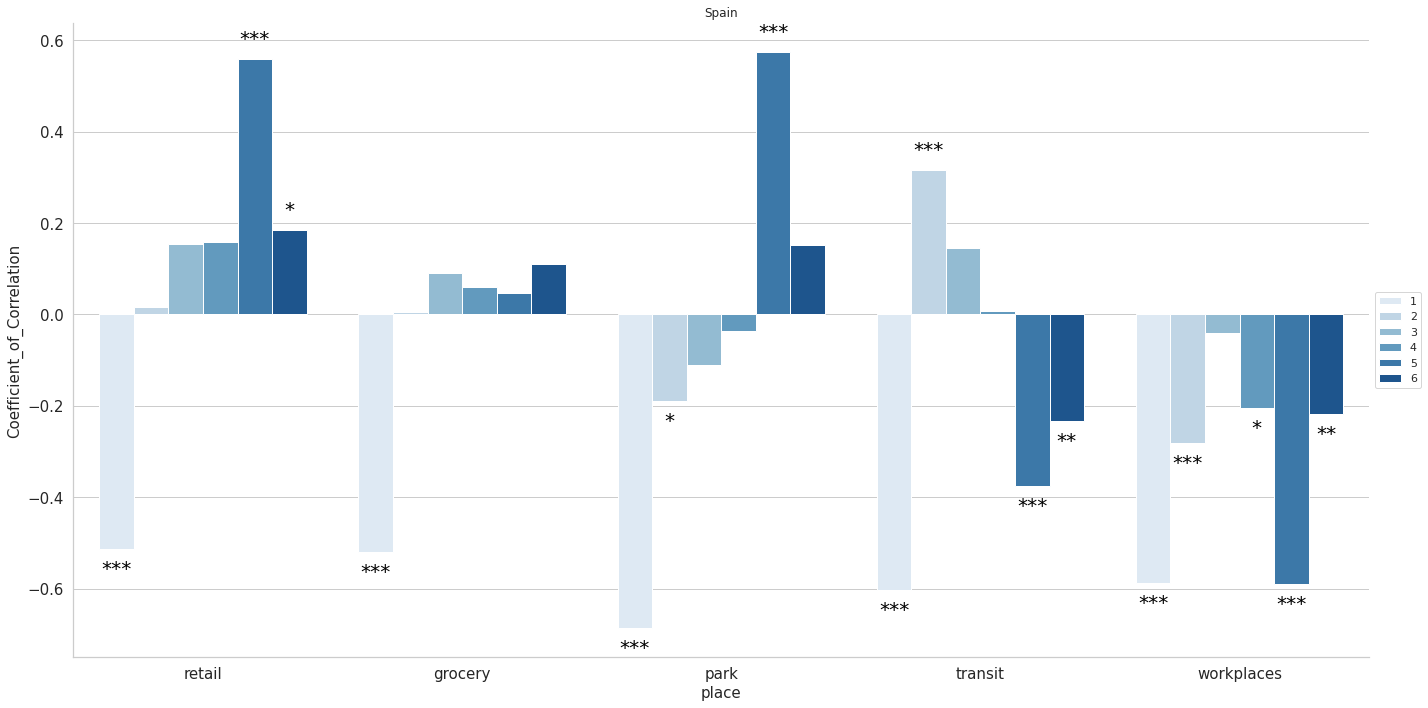

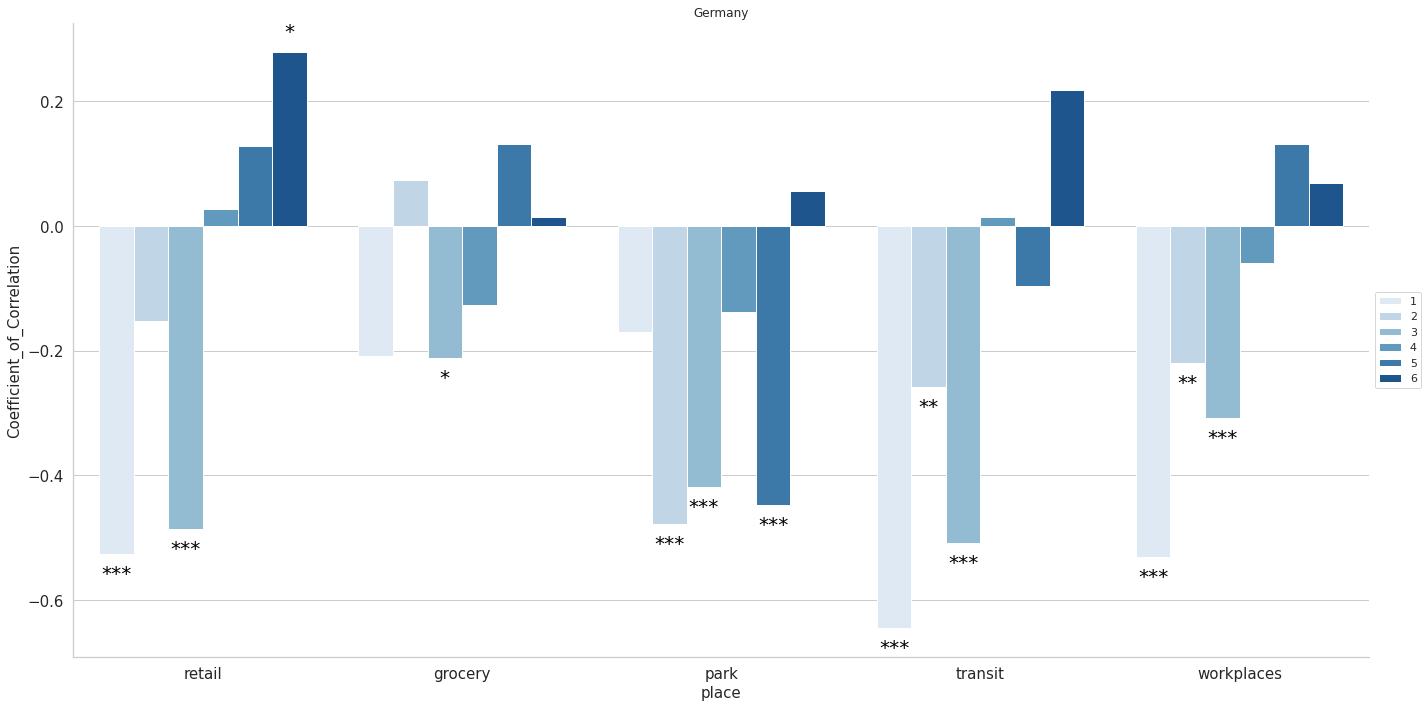

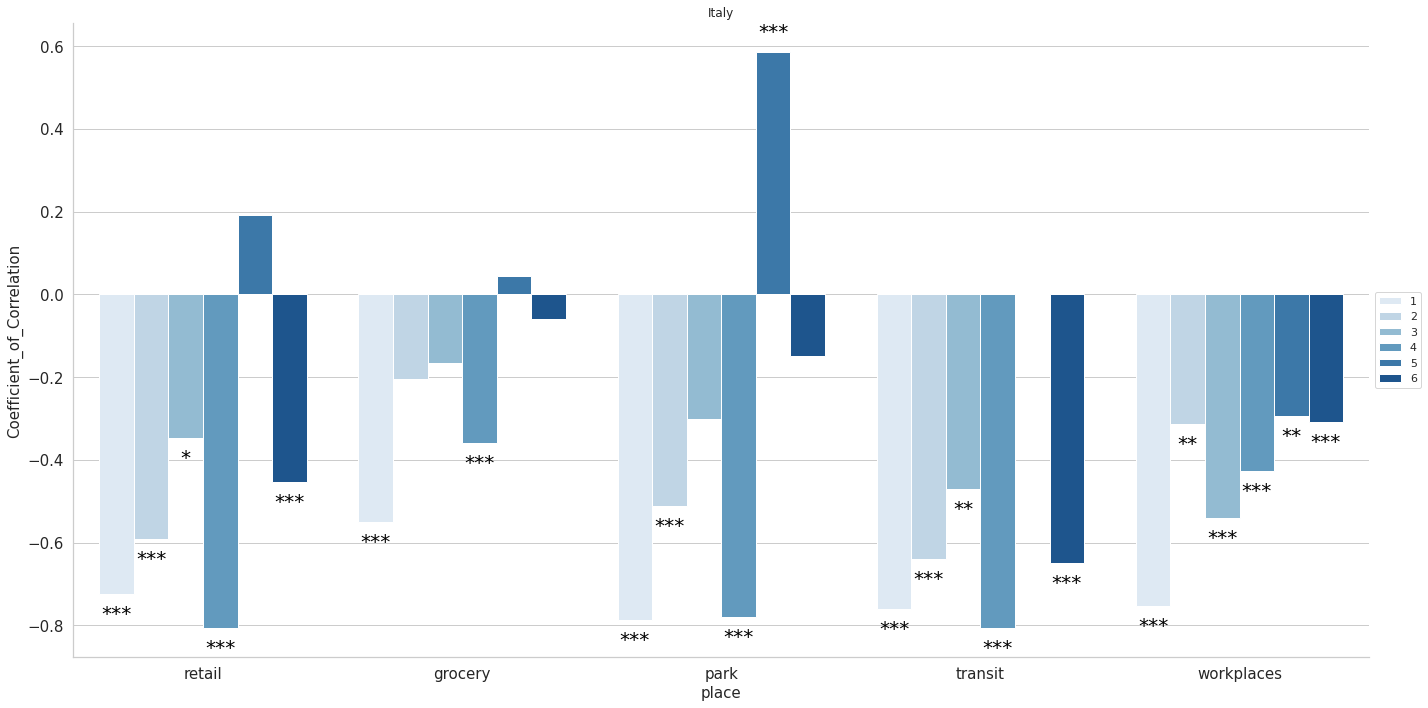

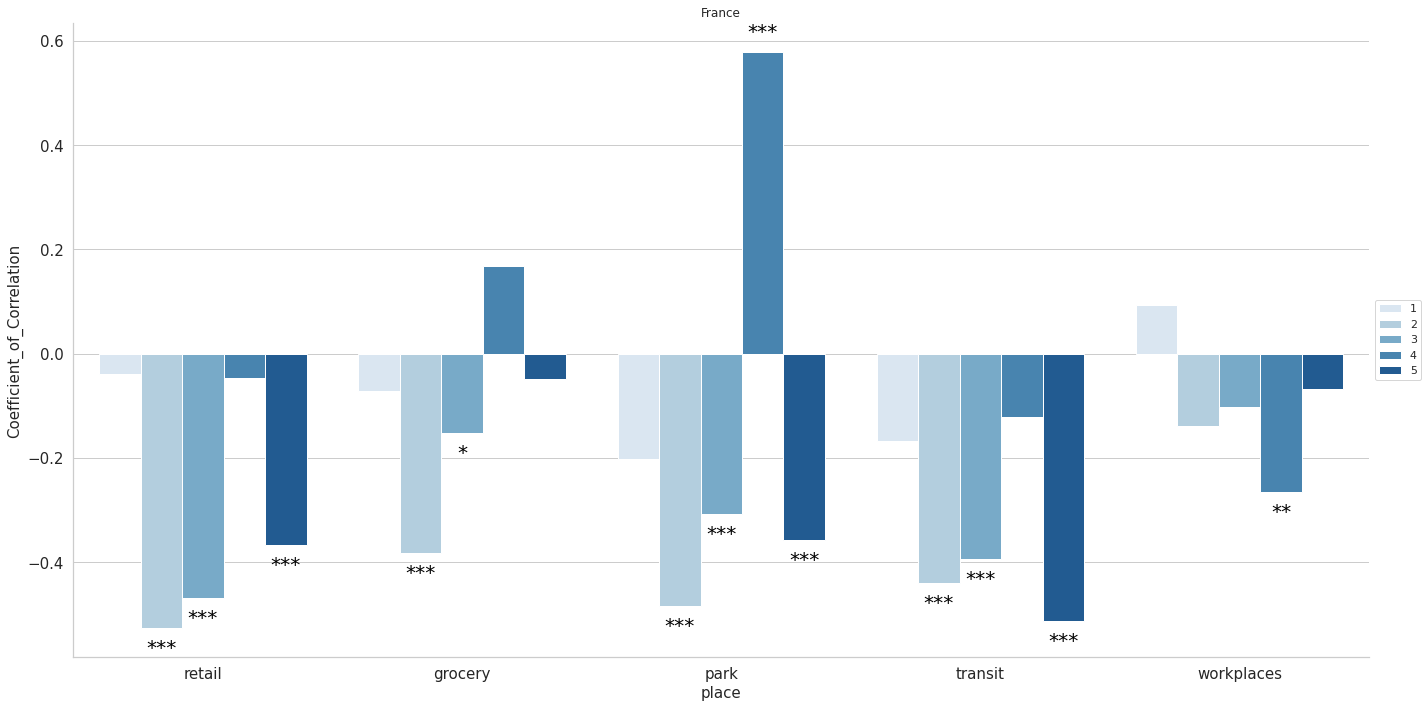

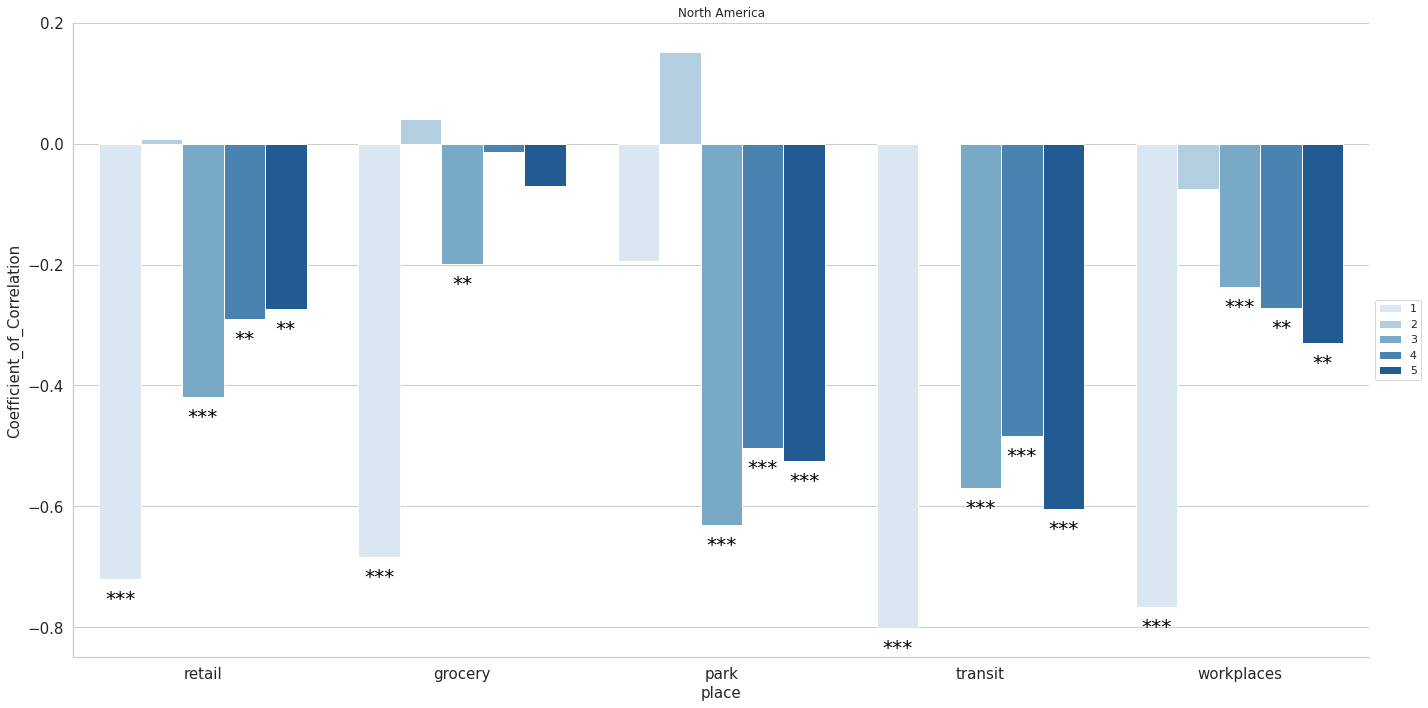

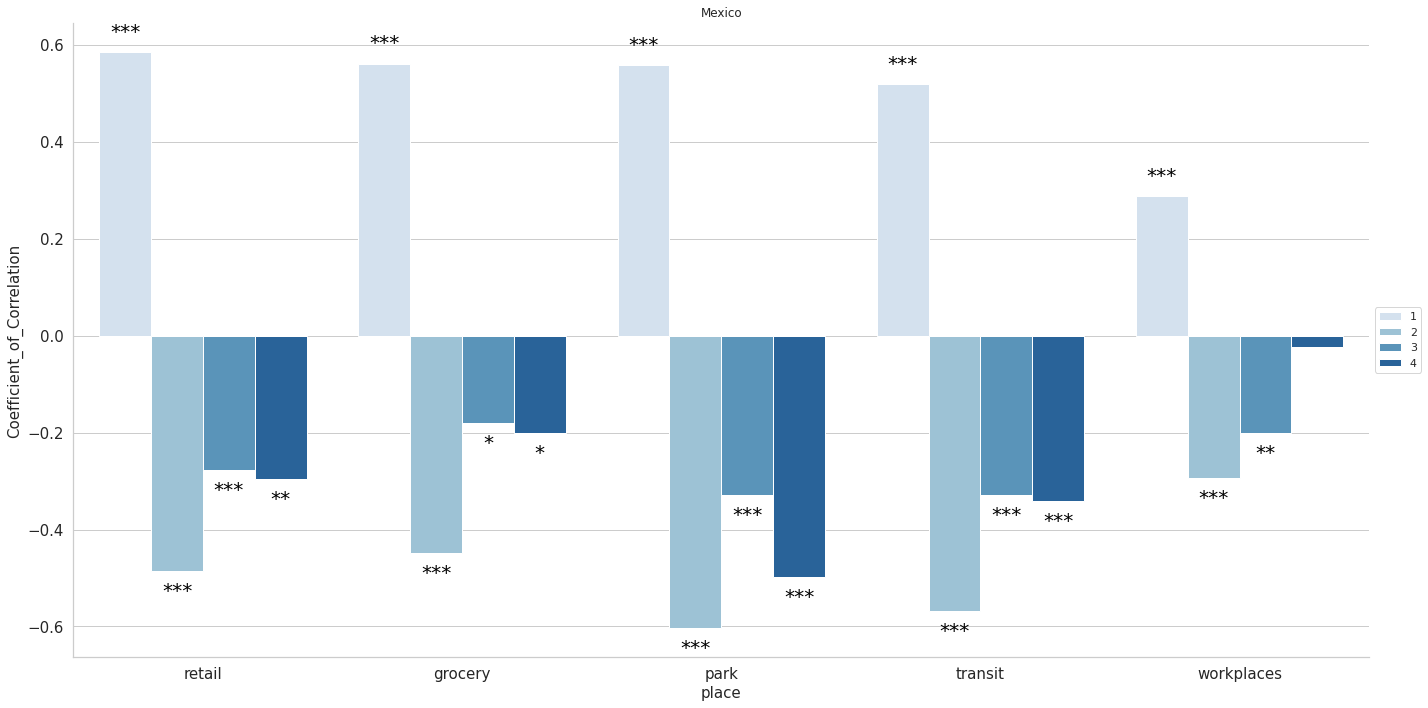

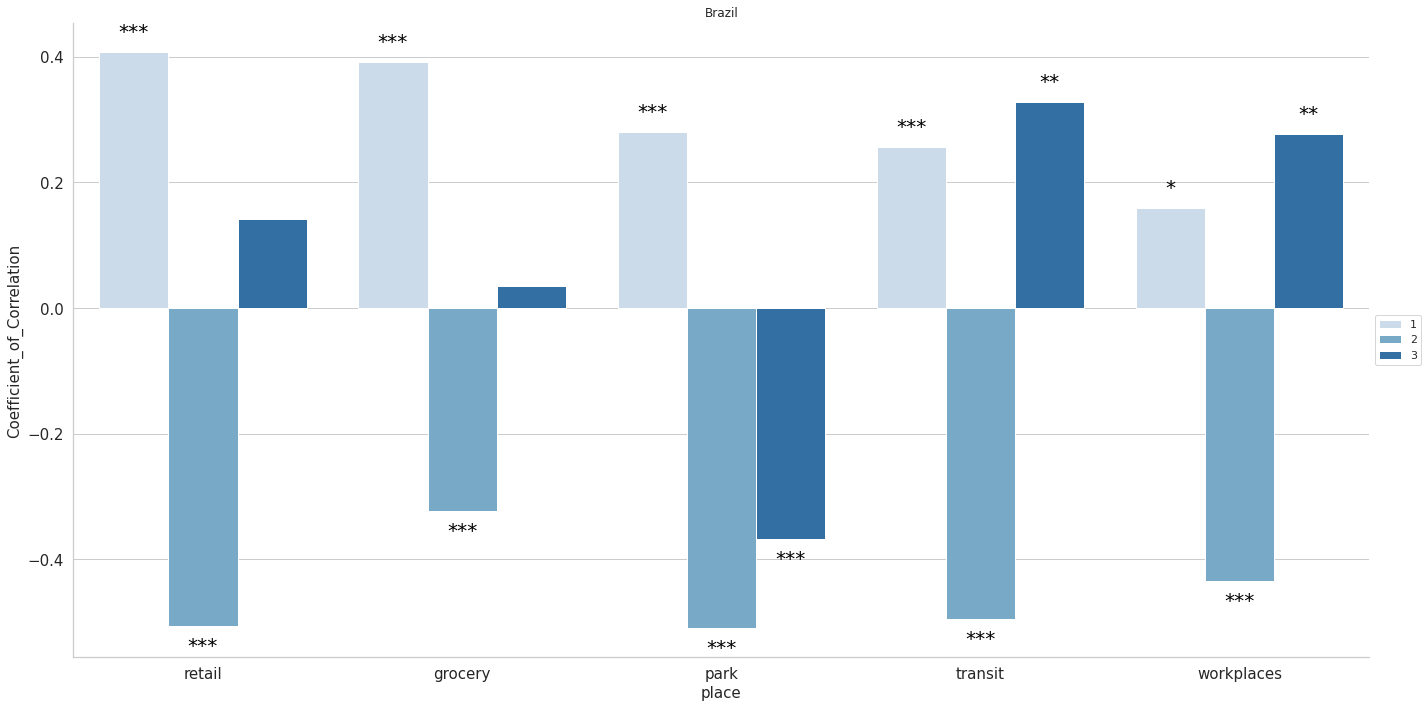

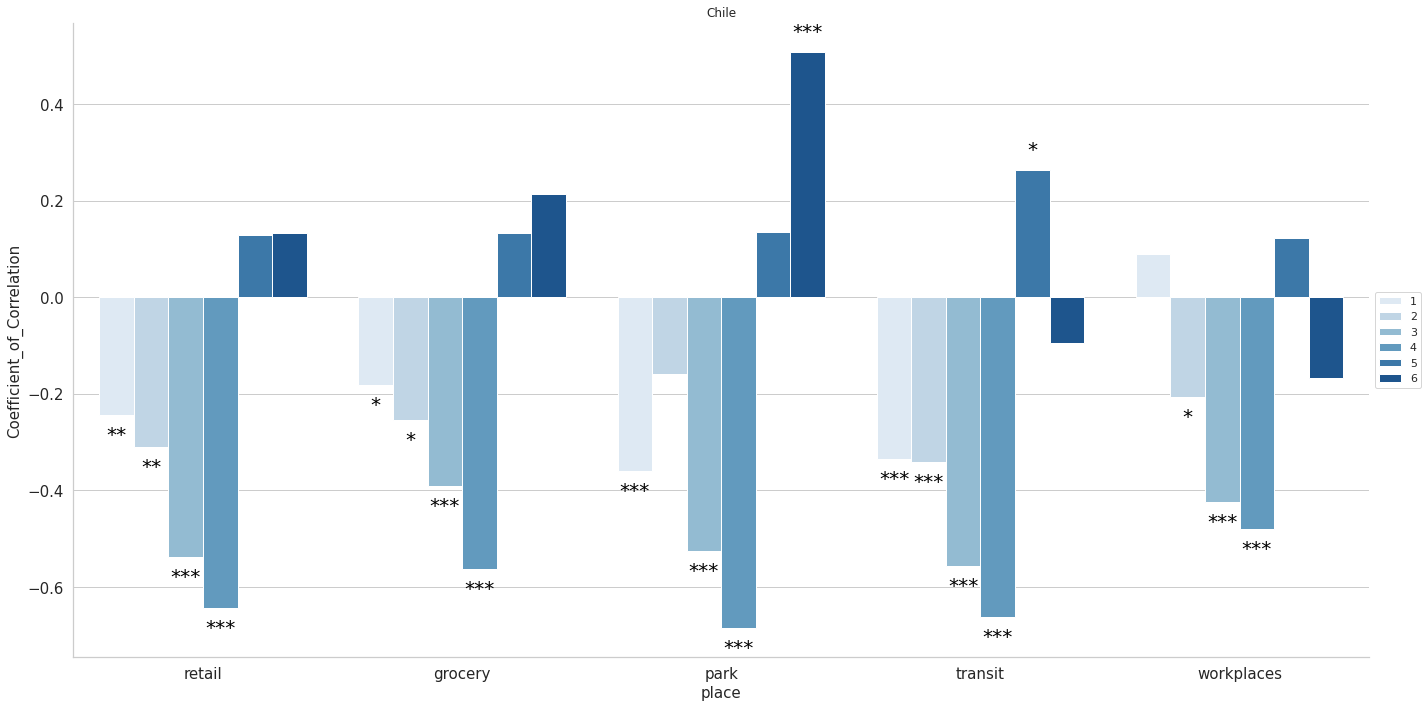

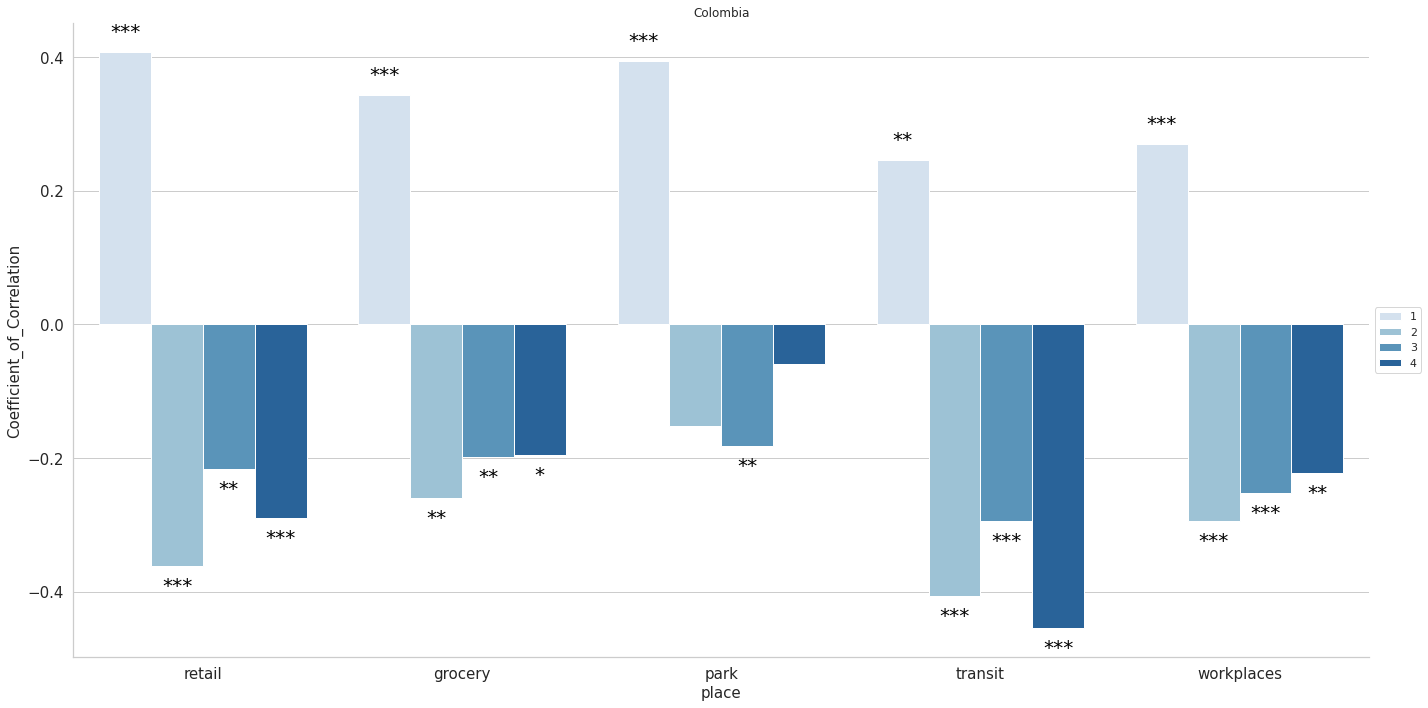

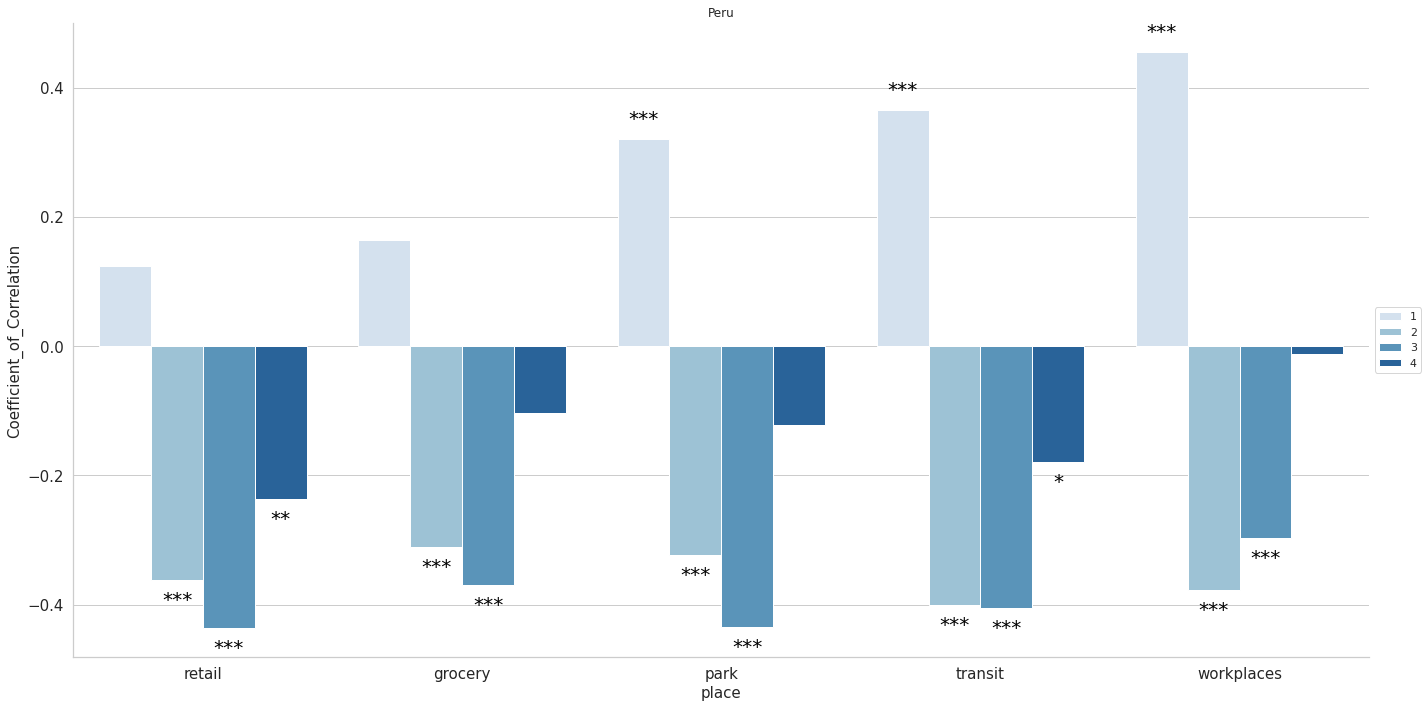

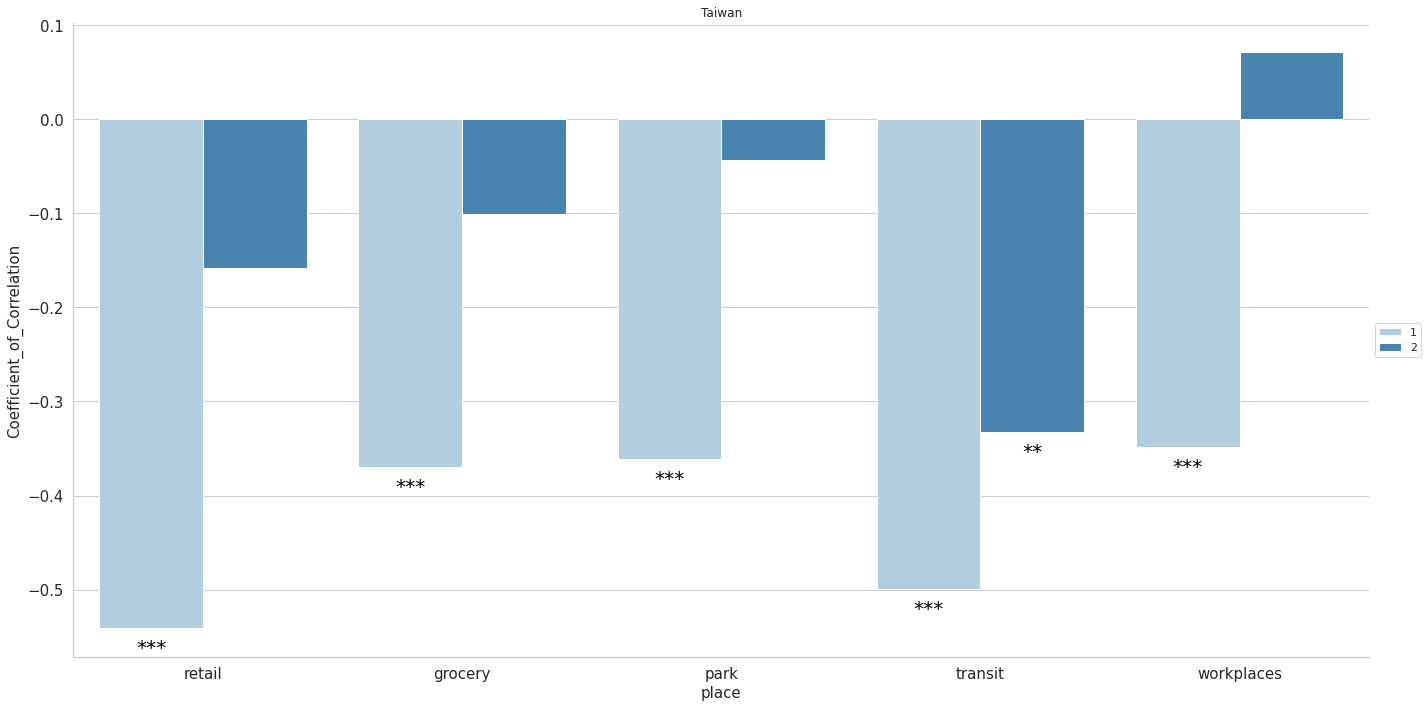

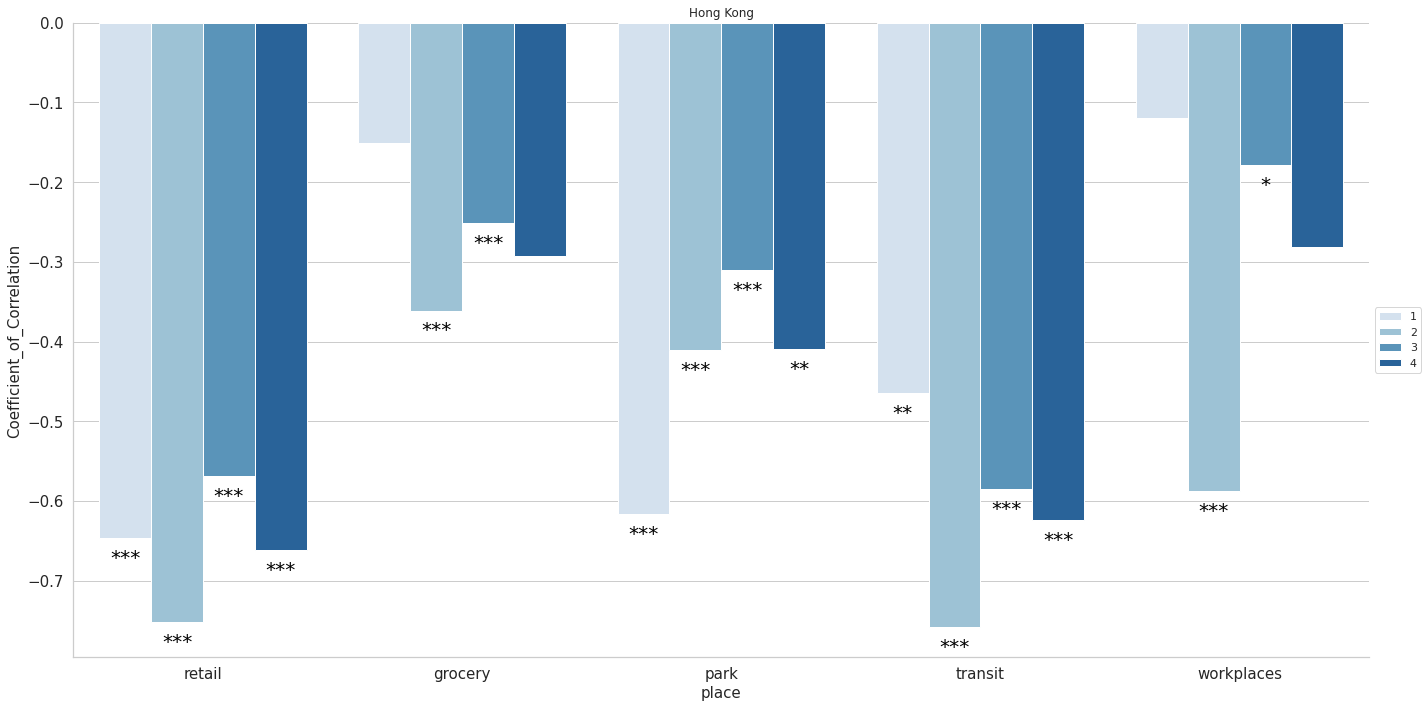

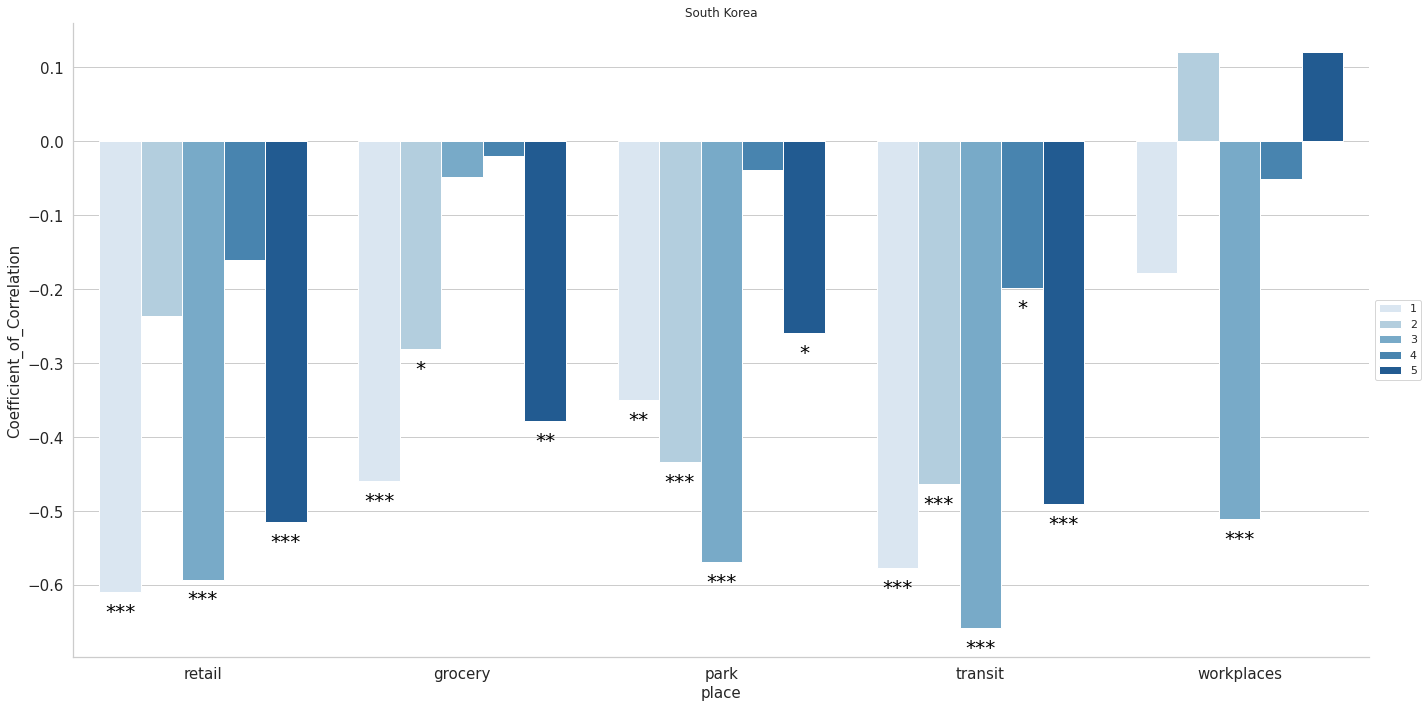

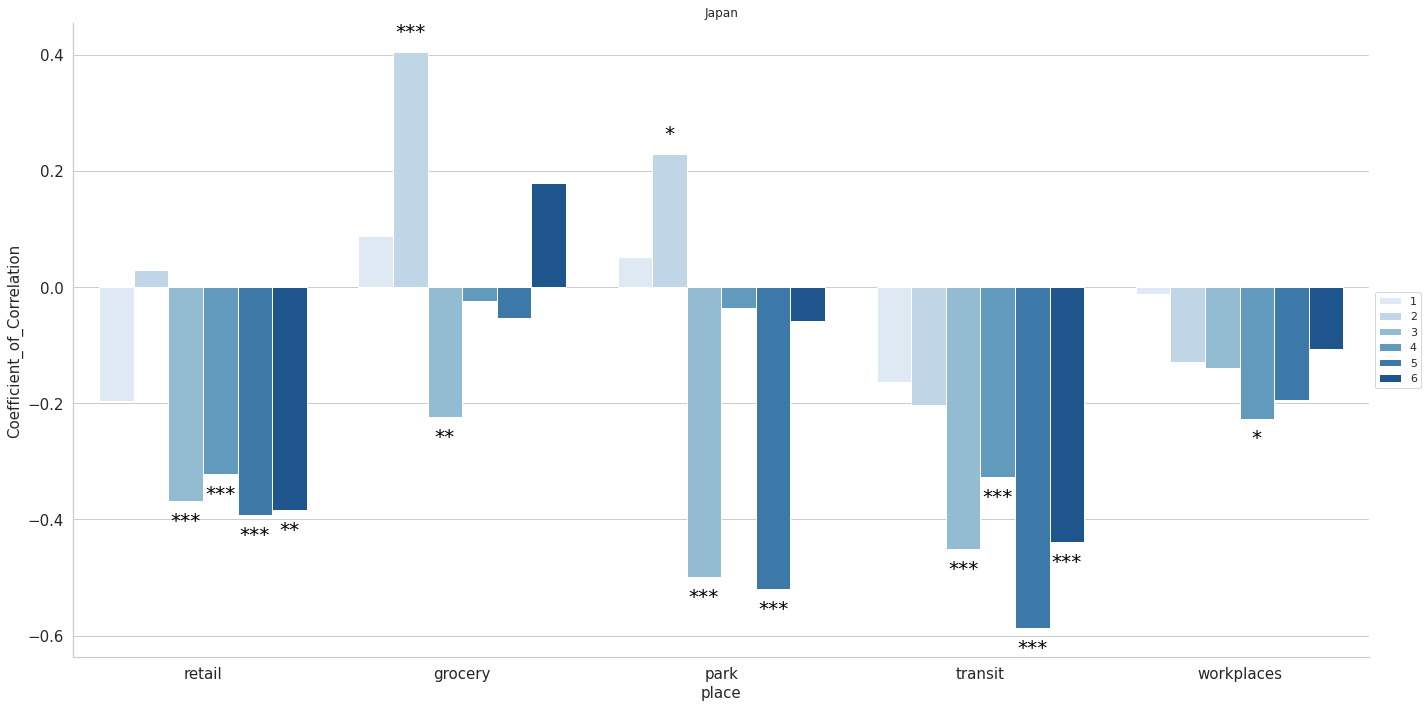

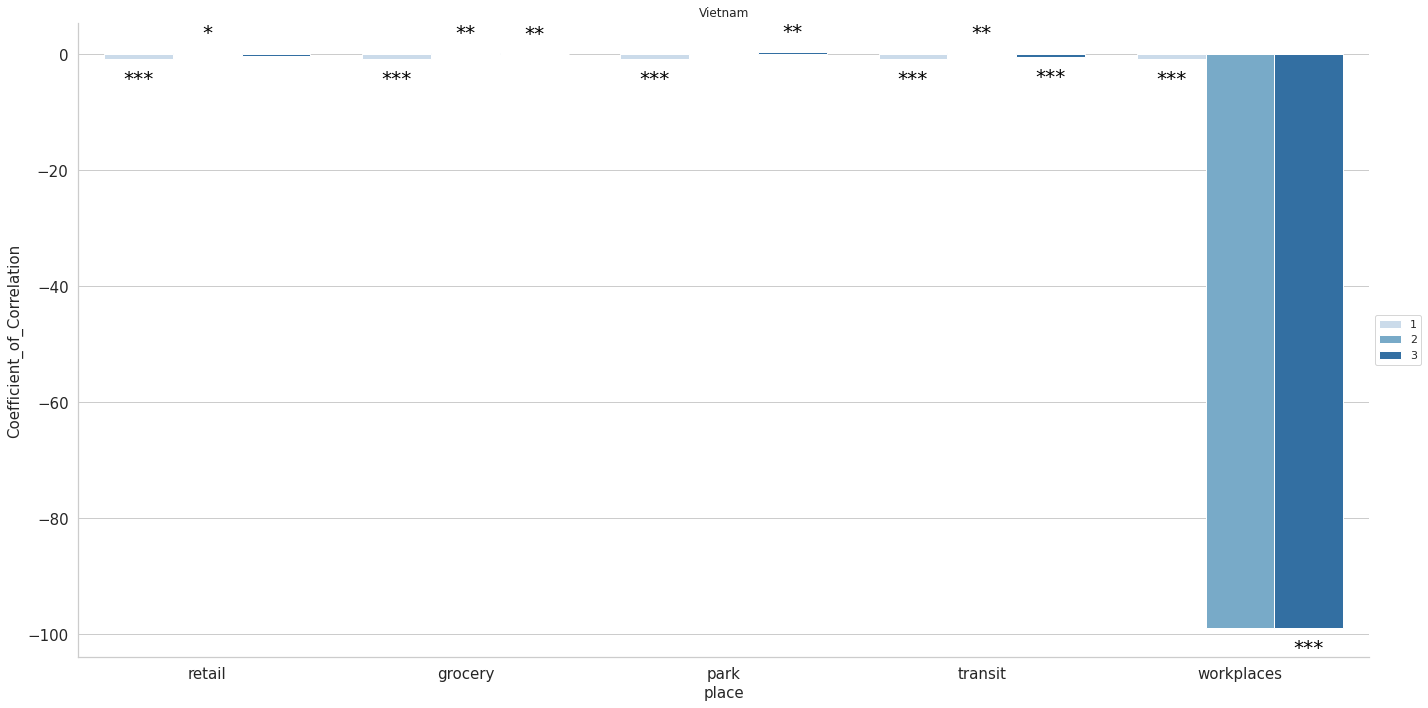

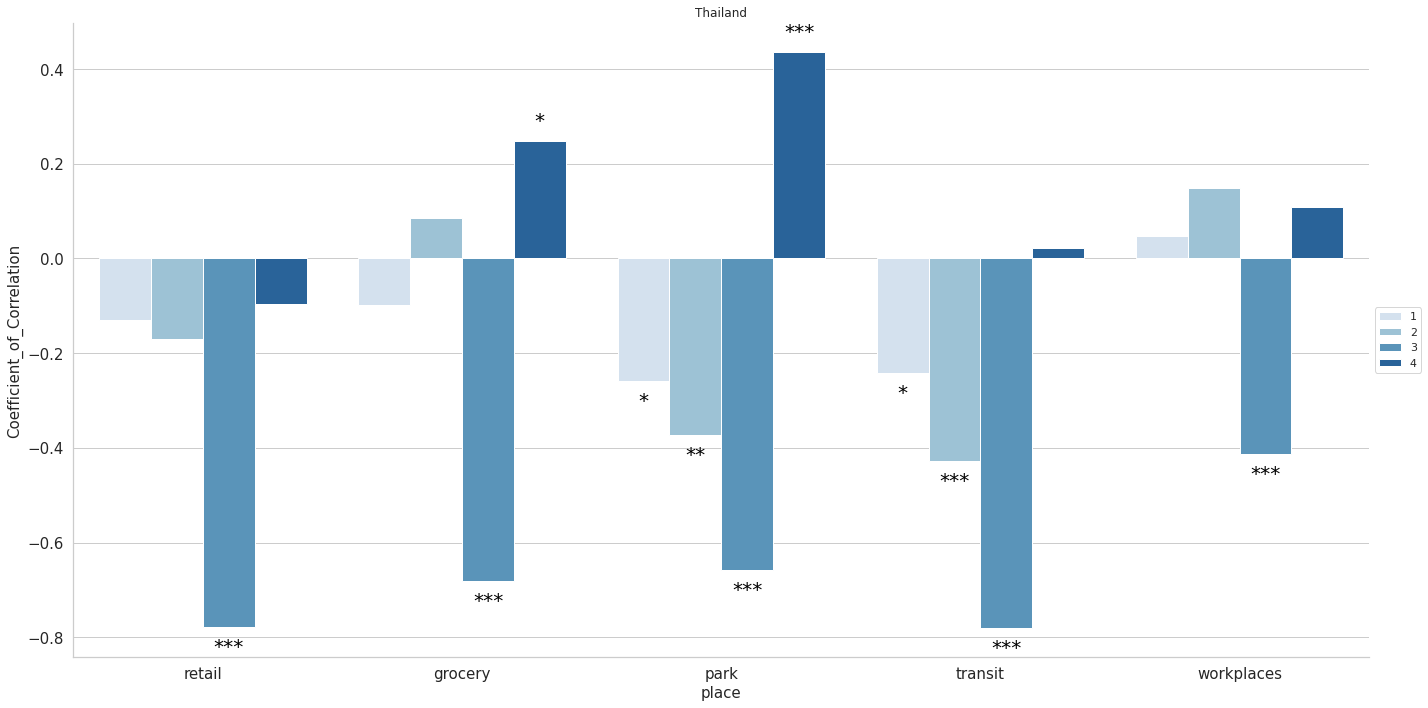

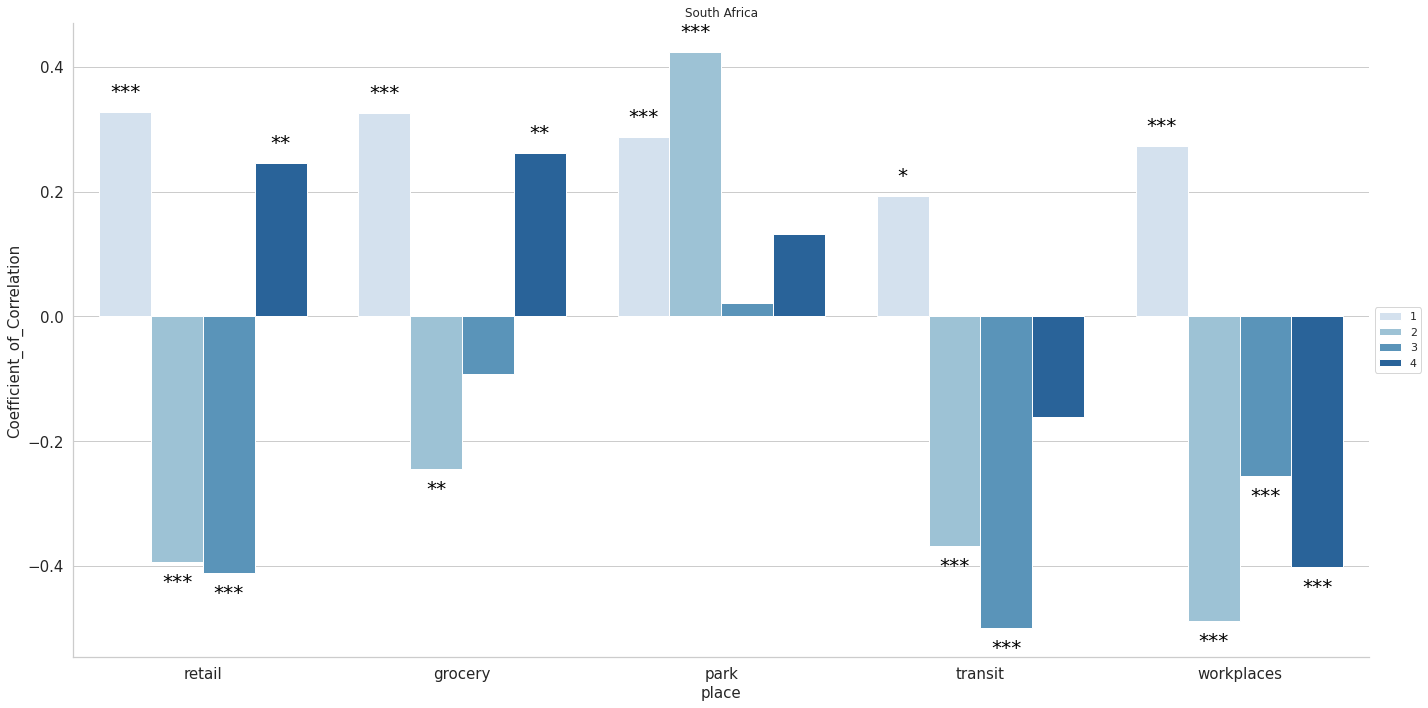

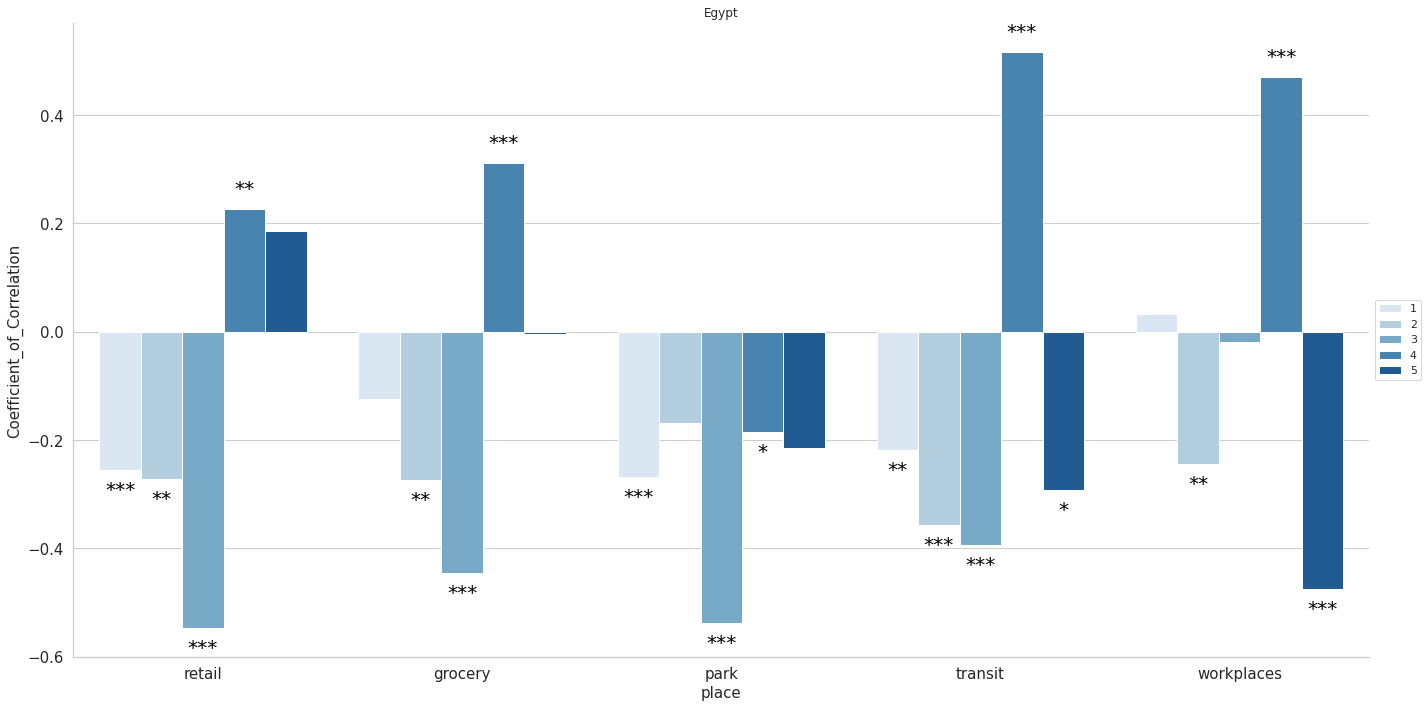

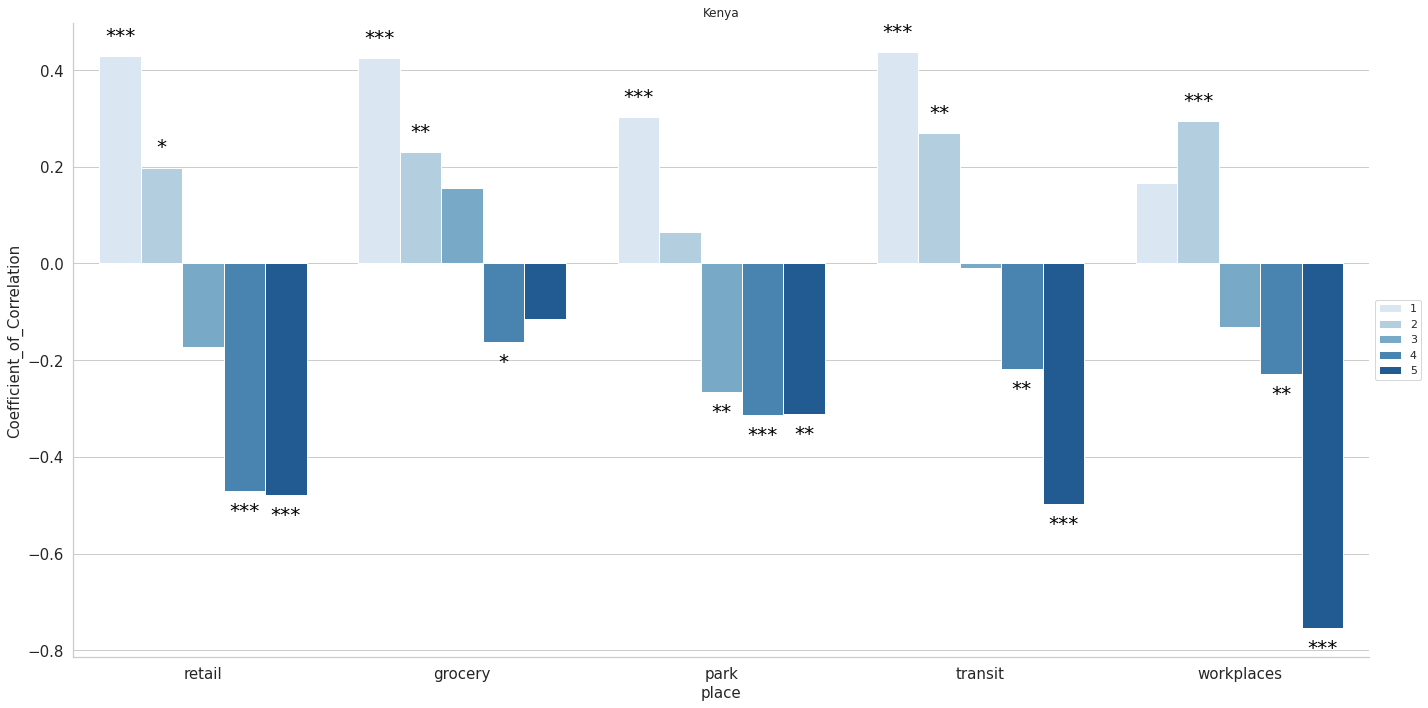

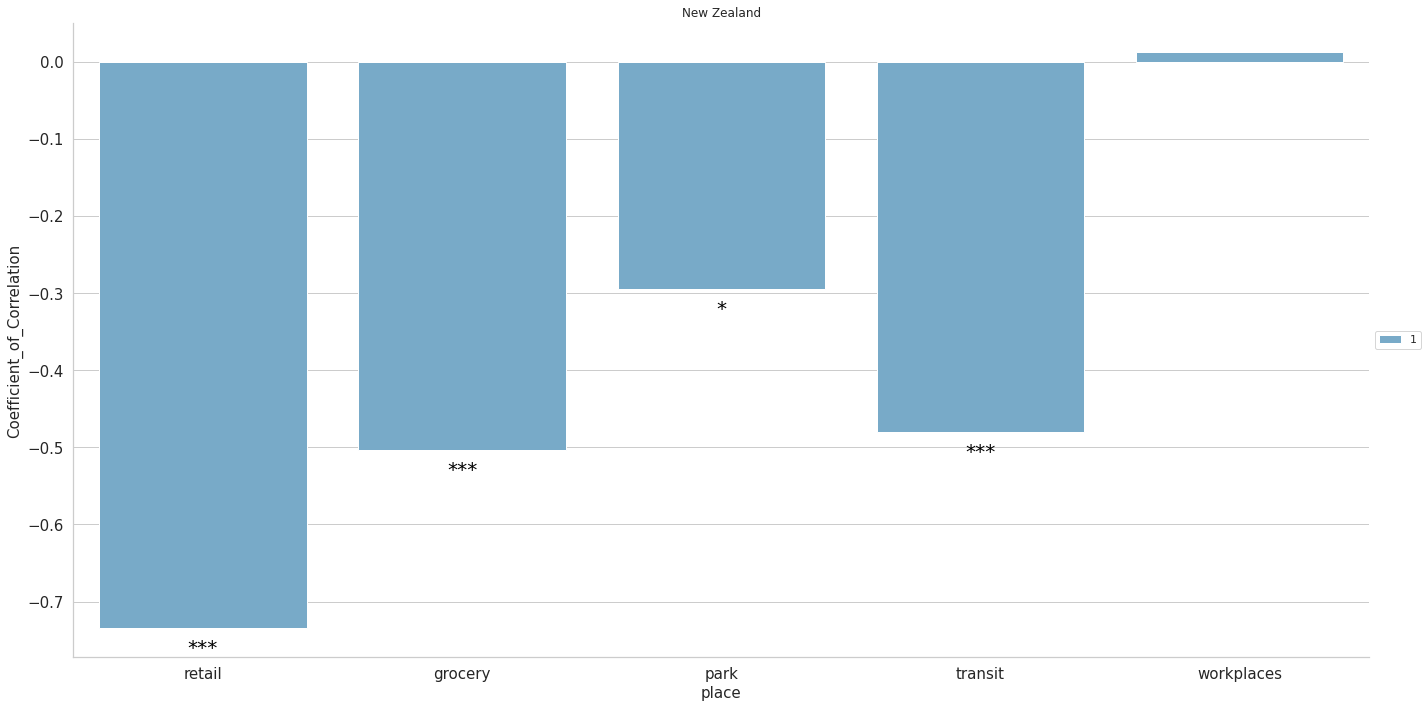

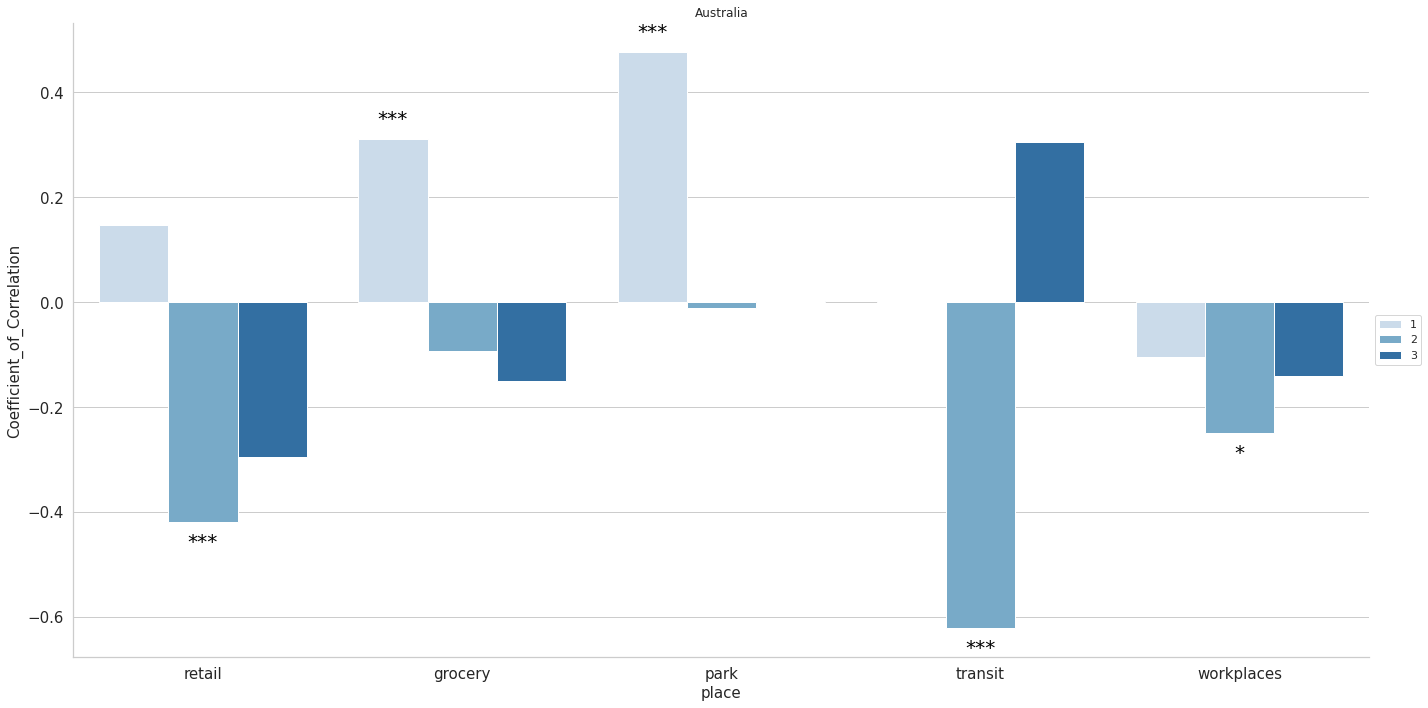

In [9]:
import gspread
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())
urls='https://docs.google.com/spreadsheets/d/1Jxcr8PvzqyEOa3DDT7wh9sBgJDGoDTqqLvDoT1r9R10/edit#gid=337413139'

sheet_name = ['Europe', 'North America','South America','Asia','Africa','Oceania'] 
country_mobility_1 = gc.open_by_url(urls)

for i_1 in range(len(sheet_name)):
  sheet = country_mobility_1.worksheet(sheet_name[i_1])  #讀取國家全名的全部sheet

  data=[]
  col=[ii for ii in range(1,7)]

  for b in col:
    c = deletenan(sheet,a = b)  #去除每條column的nan值
    data.append(c)

  countryplot(data)

